## <strong> 7. NumPy 고급 기능 </strong>
+ 브로드캐스팅 (broadcasting)
+ 마스킹 (masking)
+ 팬시 인덱싱 (fancy indexing)

In [1]:
import numpy as np

### <strong> 브로드캐스팅 연산 </strong>
+ ```np.ones()```: 1로 이루어진 NumPy 배열 생성

In [2]:
# 1D + 스칼라
a = np.array([0, 1, 2])
print(a + 5)

[5 6 7]


In [3]:
# 1D + 2D 배열
a = np.ones((3,3))      # [+] 1로 이루어진 (3, 3)의 배열 생성
print(a, '\n')

b = np.arange(3)  # [+] [0, 1, 2]로 이루어진 정수 배열 생성
print(b, '\n')

print(a+b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[0 1 2] 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [ ]:
# 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a[:, np.newaxis]    # [+] 차원 추가: (3,) -> (3, 1)
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

[[0]
 [1]
 [2]] 

[0 1 2] 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


### <strong> 브로드캐스팅 규칙 </strong>

In [ ]:
# 예제: 1D + 2D
a = np.ones((2, 3))
b = np.arange(3)

a+b

In [ ]:
# 예제: 두 배열 모두 브로드캐스팅이 적용되는 경우
a = np.arange(3)
a = a.reshape((3, 1))
b = np.arange(3)

a+b

In [ ]:
# 예제: 브로드캐스팅이 불가능한 경우
a = np.ones((3, 2))
print(a, '\n')

b = np.arange(3)
print(b, '\n')

print(a + b)

### <strong> 비교 연산, 마스크, 불리언 연산 </strong>

In [ ]:
# 배열의 비교 연산(마스킹)
x = np.array([1, 2, 3, 4, 5])

print(x < 3)
print(x >= 3)
print(x != 3)
print(x == 3)

#### **예제: 시애틀 2014년 강수량**

In [ ]:
import pandas as pd  # 데이터 조작을 위한 라이브러리

df = pd.read_csv('./data/seattle2014.csv')
prcp = df['PRCP'].values   # PRCP: Precipitation (강수량),딕셔너리 문법스타일
prcp = prcp / 254.0  # 인치(inch) 단위로 변환
prcp[:10]

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

In [14]:
# [+] 비가 온 날은 며칠일까?
rain_day=np.sum([prcp>0])
rain_day

150

In [17]:
# [+] 비가 온 날의 평균 강수량은?
avg_rain=np.mean(prcp)
avg_rain

0.1329737892352497

In [18]:
# [+] 0.5인치 이상 비가 온 날은 며칠?
np.sum([prcp>0.5])  # 0.5인치 이상 비가 온 날의 강수량

37

#### **시각화 라이브러리 (seaborn) 설치**

In [19]:
!pip install seaborn

In [20]:
# 시각화 설정 코드
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
%config InlineBackend.figure_format = 'svg'

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

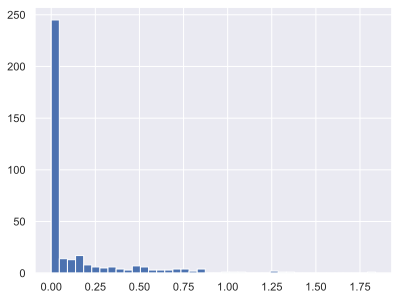

In [21]:
# 강수량 히스토그램 시각화
plt.hist(prcp, 40)

In [22]:
# 다차원 배열의 비교 연산
np.random.seed(0)
x = np.random.randint(10, size=(3, 4))
print(x, '\n')

print(x < 6)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]] 

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


In [ ]:
# Boolean 배열 연산
print(np.count_nonzero(x < 6))  # [+] 6보다 작은가? np.count_nonzero()는 0이 아닌 값의 개수를 세는 함수
print(np.sum(x < 6))            # [+] 6보다 작은가? np.sum()
print(np.any(x > 8))            # [+] 8보다 큰 값이 있는가?
print(np.all(x > 1))            # [+] 모든 값이 1보다 큰가? 

In [ ]:
# Boolean 배열을 이용한 데이터 선택
print(x, '\n')
print(x < 5, '\n')

print(x[x < 5])

### <strong> 팬시 인덱싱(fancy indexing) </strong>

In [2]:
# 난수 배열 생성
np.random.seed(1)
x = np.random.randint(100, size=10)
x

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1])

In [3]:
# 기본 문법: 2, 4, 6번 원소 선택하기
a = x[2]
b = x[4]
c = x[6]

print([a, b, c])

[72, 75, 79]


In [5]:
# 팬시 인덱싱: 2, 4, 6번 원소 선택하기
ind = [2,4,6]  # [+] 인덱스 배열 생성
x[ind]        # [+] 인덱스 배열을 이용한 값 선택

array([72, 75, 79])

In [7]:
# 팬시 인덱싱: 다차원 배열
np.random.seed(2)
x = np.random.randint(10, size=(3, 5))
print(x, '\n')

row = [0, 1, 2]
col = [2, 1, 4]

print(x[row, col])

[[8 8 6 2 8]
 [7 2 1 5 4]
 [4 5 7 3 6]] 

[6 2 6]


In [8]:
# 팬시 인덱싱: 다차원 배열 + 브로드캐스팅
row = np.array([0, 1, 2])
col = np.array([2, 1, 4])

x[row[:, np.newaxis], col]

array([[6, 8, 8],
       [1, 2, 4],
       [7, 5, 6]])

In [9]:
# 결합 인덱싱
x = np.arange(1, 13).reshape(3, 4)
print(x, '\n')

ind = [2, 0, 1]

print(x[2, ind], '\n')
print(x[1:, [2, 0, 1]])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[11  9 10] 

[[ 7  5  6]
 [11  9 10]]


#### **예제: 팬시 인덱싱을 이용한 임의의 점 집합 선택하기**
+ ```np.random.seed()```: 난수 생성을 위한 초기상태(seed)를 관리 (전역적 상태)
+ ```np.random.RandomState()```: seed를 별도 객체에서 관리 (지역적 상태) ${\rightarrow}$ 독립적인 난수 생성기를 여러 개 생성 가능

In [10]:
mean = [0, 0]     # 평균
cov = [[1, 2],    # 공분산
      [2, 5]]

rand = np.random.RandomState(1)  # RandomState: 시드를 별도 객체에서 관리,고정시드 사용안해도됨
x = rand.multivariate_normal(mean, cov, 100)  # 정규분포 다변량 데이터 생성
print(x[:10])
print(x.shape)

[[-1.26659039e+00 -3.71998007e+00]
 [ 8.98574387e-01  1.00797760e+00]
 [ 8.12283322e-02 -2.29506499e+00]
 [-1.32069461e+00 -4.01236325e+00]
 [-1.99323780e-01 -7.51126722e-01]
 [-5.62429879e-01 -3.58770608e+00]
 [ 4.44845894e-01  6.58255553e-01]
 [-6.26556217e-01 -2.70315425e+00]
 [ 4.95244764e-01  2.45439522e-01]
 [-2.62034143e-01 -1.77174030e-03]]
(100, 2)


In [12]:
import matplotlib.pyplot as plt

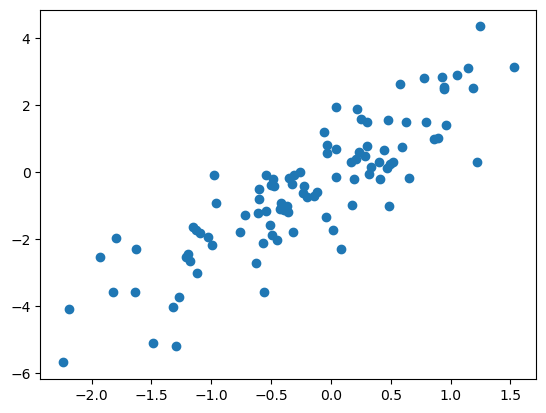

In [13]:
# 산포도 출력: scatter(x, y)
plt.scatter(x[:, 0], x[:, 1]);

In [15]:
# 20개의 점을 무작위 추출(random sampling) -> 인덱스 값을 리턴
ind = np.random.choice(x.shape[0], 20, replace=False)
print(ind)

[90 41 74 76 44 54 25 10 13 75 53 23  0 71 67 86 55  4 35 70]


In [16]:
# 선택된 점 집합 출력
selected = x[ind]      # 팬시 인덱싱
print(selected)
print(selected.shape)

[[ 1.05570147  2.88807041]
 [-0.32928022 -0.35111607]
 [-0.47599808 -0.4103727 ]
 [-1.79666967 -1.97037456]
 [-0.54478296 -0.09267783]
 [ 0.23347278  0.59895489]
 [-0.14252103 -0.7253487 ]
 [ 0.57877273  2.636321  ]
 [ 0.47163922  0.12576827]
 [ 1.21828261  0.305745  ]
 [-0.31921953 -1.80294221]
 [-0.98011575 -0.09290897]
 [-1.26659039 -3.71998007]
 [-1.08991624 -1.81905086]
 [-0.49384316 -1.86714765]
 [-2.24071996 -5.67869687]
 [ 1.14798871  3.11261598]
 [-0.19932378 -0.75112672]
 [ 1.52723792  3.14104857]
 [ 0.21130445  0.40000514]]
(20, 2)


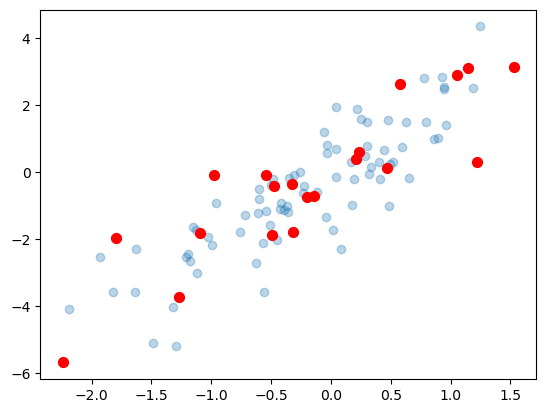

In [18]:
# 선택된 점 집합 시각화
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)    # 원본 점 집합
plt.scatter(selected[:, 0], selected[:, 1], # 선택된 점 집합
            facecolor='red', s=50);
plt.show()